# Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [2]:
# Import the data from a Json file

with open('money_data', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-04-22 15:57', 'artistName': 'Vaance', 'trackName': 'Worth It', 'msPlayed': 76730}, {'endTime': '2020-05-01 21:06', 'artistName': 'Joji', 'trackName': 'Run', 'msPlayed': 175854}, {'endTime': '2020-05-02 07:51', 'artistName': 'Joji', 'trackName': 'Run', 'msPlayed': 3266}, {'endTime': '2020-05-02 07:51', 'artistName': 'Daft Punk', 'trackName': 'Something About Us', 'msPlayed': 766}, {'endTime': '2020-05-02 07:51', 'artistName': 'The Weeknd', 'trackName': 'In The Night', 'msPlayed': 1366}]


In [3]:
# Convert from JSON to a data frame

history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [4]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9468 entries, 0 to 9467
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  9468 non-null   object
 1   end_time     9468 non-null   object
 2   ms_played    9468 non-null   int64 
 3   track_name   9468 non-null   object
dtypes: int64(1), object(3)
memory usage: 296.0+ KB


In [5]:
history = history_1.copy()

In [6]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9468 entries, 0 to 9467
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  9468 non-null   object
 1   end_time     9468 non-null   object
 2   ms_played    9468 non-null   int64 
 3   track_name   9468 non-null   object
dtypes: int64(1), object(3)
memory usage: 296.0+ KB


In [7]:
#converting end_time to timestamp format
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Vaance,2020-04-22 15:57:00,76730,Worth It
1,Joji,2020-05-01 21:06:00,175854,Run
2,Joji,2020-05-02 07:51:00,3266,Run
3,Daft Punk,2020-05-02 07:51:00,766,Something About Us
4,The Weeknd,2020-05-02 07:51:00,1366,In The Night


In [8]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Vaance,2020-04-22 15:57:00,Worth It,1.278833
1,Joji,2020-05-01 21:06:00,Run,2.930900
2,Joji,2020-05-02 07:51:00,Run,0.054433
3,Daft Punk,2020-05-02 07:51:00,Something About Us,0.012767
4,The Weeknd,2020-05-02 07:51:00,In The Night,0.022767


# Popularity of artist based on the number of times their songs were clicked and played

In [9]:

most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
The Weeknd           401
Tame Impala          331
Arctic Monkeys       293
Daft Punk            228
Avicii               227
Twenty One Pilots    165
grandson             136
Gesaffelstein        131
Oliver Tree          124
Paul McCartney       114
Drake                109
Foster The People    108
Cabaret Nocturne     107
Gorillaz             103
Black Light Smoke     84
Name: track_name, dtype: int64


In [10]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show()

# Popularity of artist based on the total amount of time spent listening to their songs

In [11]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = history.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Arctic Monkeys       494.546883
The Weeknd           480.611633
Tame Impala          417.432083
Daft Punk            342.149500
Foster The People    255.583167
Avicii               213.930217
Gesaffelstein        210.379950
Twenty One Pilots    195.499483
grandson             188.129817
Black Light Smoke    173.991017
Oliver Tree          170.660800
Cabaret Nocturne     170.194967
Gorillaz             168.296283
Paul McCartney       162.515450
Internet Money       119.931500
Name: minutes_played, dtype: float64

In [12]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show()


# Total amount of time spent listening to music each day

In [13]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Vaance,Worth It,1.278833,2020-04-22,15:57:00
1,Joji,Run,2.930900,2020-05-01,21:06:00
2,Joji,Run,0.054433,2020-05-02,07:51:00
3,Daft Punk,Something About Us,0.012767,2020-05-02,07:51:00
4,The Weeknd,In The Night,0.022767,2020-05-02,07:51:00


In [14]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2020-04-22,1.278833
1,2020-05-01,2.930900
2,2020-05-02,86.894483
3,2020-05-03,49.391167
4,2020-05-04,58.317067


In [15]:
fig = px.line(day, x="day", y="minutes_played",
              labels={
                     "day": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show()

# Time spent listening on each day of the week

In [16]:
date = history_1.copy()
date['minutes_played'] = date.ms_played.divide(60000)
date.drop('ms_played', axis=1, inplace=True)

date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()


,artist_name,end_time,track_name,minutes_played,day
0,Vaance,2020-04-22 15:57,Worth It,1.278833,Wednesday
1,Joji,2020-05-01 21:06,Run,2.930900,Friday
2,Joji,2020-05-02 07:51,Run,0.054433,Saturday
3,Daft Punk,2020-05-02 07:51,Something About Us,0.012767,Saturday
4,The Weeknd,2020-05-02 07:51,In The Night,0.022767,Saturday


In [17]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head()

,day,minutes_played
0,Friday,1711.083033
1,Monday,1459.265917
2,Saturday,1653.274600
3,Sunday,1325.818583
4,Thursday,1374.557983


In [18]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

# Artist and their songs

In [19]:
artist = history_1.copy()
artist['minutes_played'] = artist.ms_played.divide(60000)
artist.drop('ms_played', axis=1, inplace=True)
artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played
0,Vaance,Worth It,1.278833
1,Joji,Run,2.930900
2,Joji,Run,0.054433
3,Daft Punk,Something About Us,0.012767
4,The Weeknd,In The Night,0.022767


In [20]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

c:\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Vaance,Worth It
1,Joji,Run
3,Daft Punk,Something About Us
4,The Weeknd,In The Night
8,The Weeknd,In Your Eyes
...,...,...
9447,Wiz Khalifa,See You Again (feat. Charlie Puth)
9449,Lorde,Liability
9456,Ali Gatie,It's You - Acoustic
9459,Meek Mill,All Eyes on You (feat. Chris Brown & Nicki Minaj)


In [21]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,$NOT,2
1,$uicideboy$,2
2,070 Shake,3
3,10cc,1
4,10k.Caash,1
...,...,...
1067,shinigami,1
1068,tobi lou,1
1069,vowl.,1
1070,Ólafur Arnalds,1


In [22]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,$NOT,2
1,$uicideboy$,2
2,070 Shake,3
3,10cc,1
4,10k.Caash,1


In [23]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,$NOT,0.029267
1,$uicideboy$,32.350133
2,070 Shake,0.653033
3,10cc,6.838000
4,10k.Caash,0.072750


In [24]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist

,artist_name,unique_songs,minutes_played
921,The Weeknd,59,480.611633
60,Arctic Monkeys,49,494.546883
71,Avicii,34,213.930217
957,Twenty One Pilots,30,195.499483
692,Paul McCartney,28,162.515450
211,Daft Punk,27,342.149500
869,Tame Impala,23,417.432083
328,Gesaffelstein,22,210.379950
768,Russ,20,19.256567
668,Oliver Tree,18,170.660800


In [25]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most listened to song

In [26]:
song = history_1.copy()
song['minutes_played'] = song.ms_played.divide(60000)
song.drop('ms_played', axis=1, inplace=True)

In [27]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
2123,Why'd You Only Call Me When You're High?,202.241350
965,Instant Crush (feat. Julian Casablancas),165.513983
945,Imagination,162.722283
1395,Opr,107.825550
1524,R U Mine?,99.540867
...,...,...
1433,Paranoid - 2012 - Remaster,0.000000
976,Isis (feat. Logic),0.000000
159,Azul,0.000000
1326,North Korea,0.000000


In [28]:
song_artist = history_1.copy()
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop('end_time', axis=1, inplace=True)
song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
3049,YOASOBI,夜に駆ける
5686,Molchat Doma,Тоска
5738,Molchat Doma,Танцевать
5736,Molchat Doma,Танцевать
5861,Molchat Doma,Танцевать
5626,Molchat Doma,Танцевать
7178,Molchat Doma,Судно (Борис Рижий)
5851,Molchat Doma,Судно (Борис Рижий)
7179,Molchat Doma,Судно (Борис Рижий)
7183,Molchat Doma,Судно (Борис Рижий)


In [29]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name
3049,YOASOBI,夜に駆ける
5686,Molchat Doma,Тоска
5738,Molchat Doma,Танцевать
7178,Molchat Doma,Судно (Борис Рижий)
5742,IC3PEAK,Смерти Больше Нет
...,...,...
8000,Blue Öyster Cult,(Don't Fear) The Reaper
6108,Eminem,'Till I Collapse
6332,Tame Impala,'Cause I'm A Man
9464,Sheck Wes,#BEENBALLIN


In [30]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
146,Arctic Monkeys,Why'd You Only Call Me When You're High?,202.241350
1304,Daft Punk,Instant Crush (feat. Julian Casablancas),165.513983
1324,Foster The People,Imagination,162.722283
874,Gesaffelstein,Opr,107.825550
745,Arctic Monkeys,R U Mine?,99.540867
...,...,...,...
1582,Russ,Freed Up,0.000000
2120,The Encounter,Astrid,0.000000
491,Ina Wroldsen,Strongest (Alan Walker Remix),0.000000
1569,Mad Zach,Further Than It,0.000000


In [31]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artist_name,track_name,minutes_played
0,Arctic Monkeys,Why'd You Only Call Me When You're High?,202.241350
1,Daft Punk,Instant Crush (feat. Julian Casablancas),165.513983
2,Foster The People,Imagination,162.722283
3,Gesaffelstein,Opr,107.825550
4,Arctic Monkeys,R U Mine?,99.540867
5,Arctic Monkeys,Arabella,97.625617
6,MGMT,When You Die,94.427617
7,Internet Money,Lemonade,88.395000
8,Black Light Smoke,Lovework,83.232150
9,Cabaret Nocturne,Green Karma - Original Mix,81.548467


In [32]:
songs = song.drop(song.index[0])
songs

,artist_name,track_name,minutes_played
1,Daft Punk,Instant Crush (feat. Julian Casablancas),165.513983
2,Foster The People,Imagination,162.722283
3,Gesaffelstein,Opr,107.825550
4,Arctic Monkeys,R U Mine?,99.540867
5,Arctic Monkeys,Arabella,97.625617
6,MGMT,When You Die,94.427617
7,Internet Money,Lemonade,88.395000
8,Black Light Smoke,Lovework,83.232150
9,Cabaret Nocturne,Green Karma - Original Mix,81.548467
10,SIAMES,The Wolf,76.750783


In [33]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Top 50 Songs

In [34]:
top_50 = history_1.copy()
top_50['minutes_played'] = top_50.ms_played.divide(60000)
top_50.drop('ms_played', axis=1, inplace=True)
top_50

,artist_name,end_time,track_name,minutes_played
0,Vaance,2020-04-22 15:57,Worth It,1.278833
1,Joji,2020-05-01 21:06,Run,2.930900
2,Joji,2020-05-02 07:51,Run,0.054433
3,Daft Punk,2020-05-02 07:51,Something About Us,0.012767
4,The Weeknd,2020-05-02 07:51,In The Night,0.022767
...,...,...,...,...
9463,Post Malone,2021-03-20 22:11,Sunflower - Spider-Man: Into the Spider-Verse,2.632367
9464,Sheck Wes,2021-03-20 22:12,#BEENBALLIN,0.124050
9465,Juicy J,2021-03-20 22:13,Shell Shocked (feat. Kill The Noise & Madsonik...,1.032117
9466,Drake,2021-03-20 22:13,God's Plan,1.032117


In [35]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 
top_50

,track_name,minutes_played
0,Why'd You Only Call Me When You're High?,202.241350
1,Instant Crush (feat. Julian Casablancas),165.513983
2,Imagination,162.722283
3,Opr,107.825550
4,R U Mine?,99.540867
5,Arabella,97.625617
6,When You Die,94.427617
7,Lemonade,88.395000
8,Lovework,83.232150
9,Green Karma - Original Mix,81.548467


In [36]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,Instant Crush (feat. Julian Casablancas),165.513983
2,Imagination,162.722283
3,Opr,107.825550
4,R U Mine?,99.540867
5,Arabella,97.625617
6,When You Die,94.427617
7,Lemonade,88.395000
8,Lovework,83.232150
9,Green Karma - Original Mix,81.548467
10,The Wolf,76.750783


# Streaming history per 3 hour slots of a day

In [37]:
## Convert end_time to dateTime type for proper analysis

history_1["end_time"]=pd.to_datetime(history_1["end_time"])
history_1.dtypes

artist_name            object
end_time       datetime64[ns]
ms_played               int64
track_name             object
dtype: object

In [38]:
hour_counts=history_1.groupby(pd.Grouper(freq='3H',key="end_time")).count()
hour_counts.sort_values(by="track_name",ascending=False,inplace=True)
three_hour_groups=hour_counts.groupby(hour_counts.index.hour)["track_name"].sum()
three_hour_groups

end_time
0      157
3      288
6     1410
9     1208
12    1308
15     876
18    2165
21    2056
Name: track_name, dtype: int64

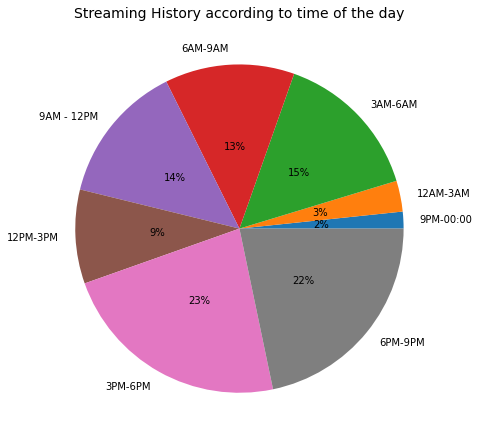

In [39]:
# Pie Chart

pie, ax = plt.subplots(figsize=[10,6])
labels = three_hour_groups.keys()
labels=["9PM-00:00","12AM-3AM","3AM-6AM","6AM-9AM","9AM - 12PM","12PM-3PM","3PM-6PM","6PM-9PM"]
plt.pie(x=three_hour_groups, autopct="%.0f%%", labels=labels, pctdistance=0.5)
plt.tight_layout()
plt.title("Streaming History according to time of the day", fontsize=14);
plt.show()

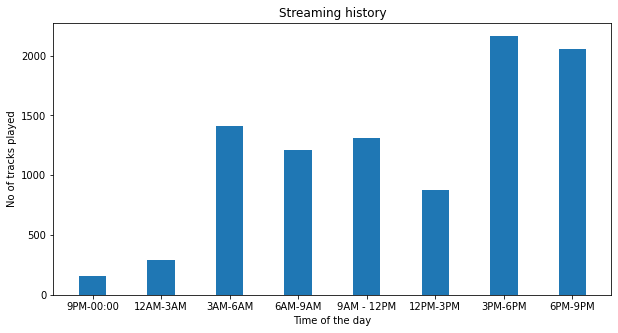

In [40]:
# Bar chart  
fig=plt.figure(figsize=(10,5))
plt.bar(labels, three_hour_groups,
        width = 0.4)
plt.xlabel("Time of the day")
plt.ylabel("No of tracks played")
plt.title("Streaming history")
plt.show()

# Comparing artist streams by time of the day


In [41]:
# weeknd_streams= history_1[history_1["artist_name"]=="The Weeknd"]
# weeknd_counts=weeknd_streams.groupby(pd.Grouper(freq='3H',key="end_time")).count()
# weeknd_groups=weeknd_counts.groupby(weeknd_counts.index.hour)["track_name"].sum()
# weeknd_groups=(weeknd_groups/weeknd_groups.sum())*100
# weeknd_groups

# zepplin_streams=history_1[history_1["artist_name"]=="Led Zeppelin"]
# zepplin_counts=zepplin_streams.groupby(pd.Grouper(freq='3H',key="end_time")).count()
# zepplin_groups=zepplin_counts.groupby(zepplin_counts.index.hour)["track_name"].sum()
# zepplin_groups=(zepplin_groups/zepplin_groups.sum())*100

In [42]:
# fig=plt.figure(figsize=(10,5))
# bar1=np.arange(len(labels))
# bar2=[i+0.4 for i in bar1]
# plt.bar(bar1, weeknd_groups,
#         width = 0.4,label="Weeknd")
# plt.bar(bar2,zepplin_groups,width=0.4,label="Zepplin")
# plt.xlabel("Time of the day")
# plt.legend()
# plt.xticks(bar1,labels)
# plt.ylabel("% of artist's tracks played")
# plt.title("Streaming history")
# plt.show()

In [43]:
days = history_1.copy()
days['month'] = pd.DatetimeIndex(days['end_time']).month_name()
month_group=days.groupby(by="month")

months= list(month_group.groups.keys())
for month in months:
    print(month)
    print(month_group["artist_name"].value_counts(normalize=True).loc[month].head(3))
    print("\n\n")

April
artist_name
Vaance      0.5
Warren G    0.5
Name: artist_name, dtype: float64



December
artist_name
Gesaffelstein       0.100202
Cabaret Nocturne    0.045547
Avicii              0.042510
Name: artist_name, dtype: float64



February
artist_name
Twenty One Pilots    0.088972
Daft Punk            0.068922
Tame Impala          0.047619
Name: artist_name, dtype: float64



January
artist_name
John Mayer    0.036545
Foals         0.033223
Joji          0.033223
Name: artist_name, dtype: float64



July
artist_name
Arctic Monkeys    0.106239
Daft Punk         0.089376
Juice WRLD        0.052277
Name: artist_name, dtype: float64



June
artist_name
Arctic Monkeys    0.146943
Avicii            0.108481
The Weeknd        0.106509
Name: artist_name, dtype: float64



March
artist_name
DIVINE         0.040541
Oliver Tree    0.040541
Bastille       0.033784
Name: artist_name, dtype: float64



May
artist_name
The Weeknd    0.070544
Drake         0.032310
Daft Punk     0.028541
Name: artist

In [44]:
m_grp=days.groupby(by=["month"],as_index=False)
artists_month=[]
artists_month_name=[]
for x,y in m_grp:
    print(x)
    print("--------TRACK------------")
    print(y["track_name"].value_counts().idxmax(axis=1))
    print(y["track_name"].value_counts(normalize=True).max())
    print("--------ARTIST-----------")
    artists_month_name.append(y["artist_name"].value_counts().idxmax(axis=1))
    print(y["artist_name"].value_counts().idxmax(axis=1))
    artists_month.append(y["artist_name"].value_counts(normalize=True).max())
    print(y["artist_name"].value_counts(normalize=True).max())
    print('\n')

April
--------TRACK------------
Worth It
0.5
--------ARTIST-----------
Warren G
0.5


December
--------TRACK------------
Opr
0.04048582995951417
--------ARTIST-----------
Gesaffelstein
0.10020242914979757


February
--------TRACK------------
The Run and Go
0.015037593984962405
--------ARTIST-----------
Twenty One Pilots
0.08897243107769423


January
--------TRACK------------
House Of The Rising Sun
0.02159468438538206
--------ARTIST-----------
John Mayer
0.036544850498338874


July
--------TRACK------------
Instant Crush (feat. Julian Casablancas)
0.048903878583473864
--------ARTIST-----------
Arctic Monkeys
0.10623946037099494


June
--------TRACK------------
Why'd You Only Call Me When You're High?
0.03550295857988166
--------ARTIST-----------
Arctic Monkeys
0.14694280078895464


March
--------TRACK------------
Pink Ocean
0.02702702702702703
--------ARTIST-----------
Oliver Tree
0.04054054054054054


May
--------TRACK------------
THE SCOTTS
0.028540656973613354
--------ARTIST--------

In [45]:
for month in months:
    print(month)
    print(month_group["track_name"].value_counts(normalize=True).loc[month].head(3))
    print("\n\n")

April
track_name
Lookin' At You    0.5
Worth It          0.5
Name: track_name, dtype: float64



December
track_name
Opr                           0.040486
Blind Trust - Original Mix    0.018219
Green Karma - Original Mix    0.016194
Name: track_name, dtype: float64



February
track_name
The Run and Go                                            0.015038
Borderline                                                0.012531
Feels (feat. Pharrell Williams, Katy Perry & Big Sean)    0.010025
Name: track_name, dtype: float64



January
track_name
House Of The Rising Sun           0.021595
Slow Dancing in a Burning Room    0.019934
Backyard Boy                      0.018272
Name: track_name, dtype: float64



July
track_name
Instant Crush (feat. Julian Casablancas)    0.048904
Arabella                                    0.035413
R U Mine?                                   0.035413
Name: track_name, dtype: float64



June
track_name
Why'd You Only Call Me When You're High?    0.035503
Arabella 

In [46]:
new=days.groupby(by=["month"],as_index=False).sum()
new

fig=plt.figure(figsize=(15,10))
bar1=np.arange(len(labels))
plt.bar(new['month'],,
        width = 0.4)
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-d356ea00c34b>, line 6)

In [54]:
history_1.head()

,artist_name,end_time,ms_played,track_name
0,Vaance,2020-04-22 15:57:00,76730,Worth It
1,Joji,2020-05-01 21:06:00,175854,Run
2,Joji,2020-05-02 07:51:00,3266,Run
3,Daft Punk,2020-05-02 07:51:00,766,Something About Us
4,The Weeknd,2020-05-02 07:51:00,1366,In The Night


In [56]:
history_1[history_1['artist_name']=="Vaance"].ms_played.mean()

76730.0